In [14]:
d <- read.csv("./StudentsPerformance.csv")
# print(d)
library(ggplot2)

## 1. Identify the type of attributes in the given data set.

In [2]:
for (i in colnames(d)) {
    print(paste(i, typeof(d[1, i]), sep=": "))
}

[1] "gender: character"
[1] "race.ethnicity: character"
[1] "parental.level.of.education: character"
[1] "lunch: character"
[1] "math.score: integer"
[1] "reading.score: integer"
[1] "writing.score: integer"
[1] "Target: character"


## 2. What are your observations between reading score Vs writing scores, parental level of education Vs Target.

[1] "As seen by the following data, the reading scores are more varied than writing scores"
[1] "However, their means are really close"
[1] "Mean reading score: 69.169"
[1] "Mean writing score: 68.054"


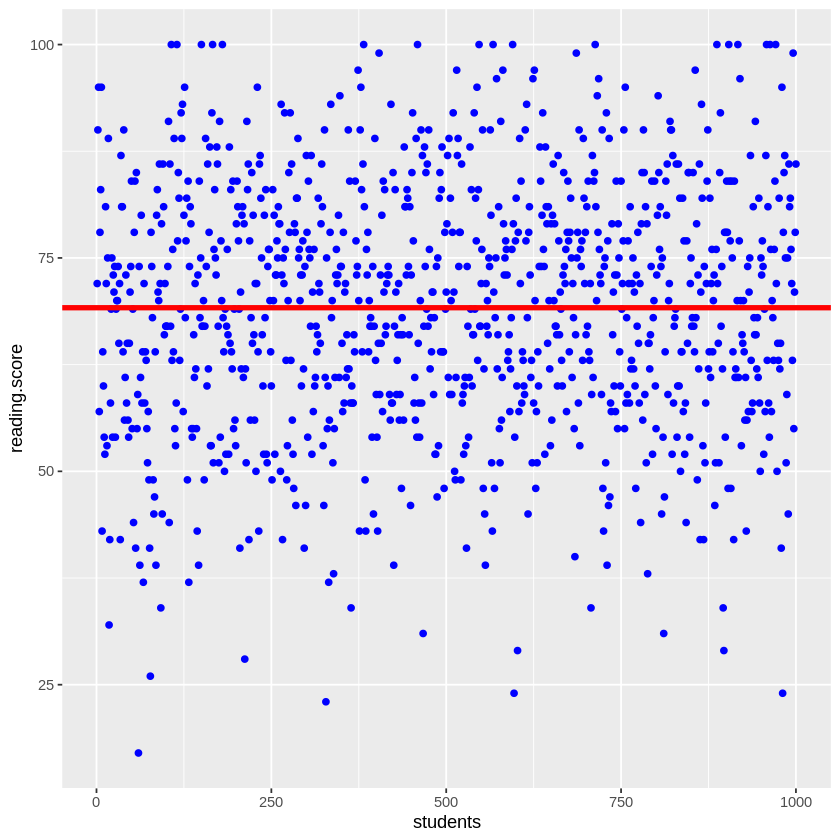

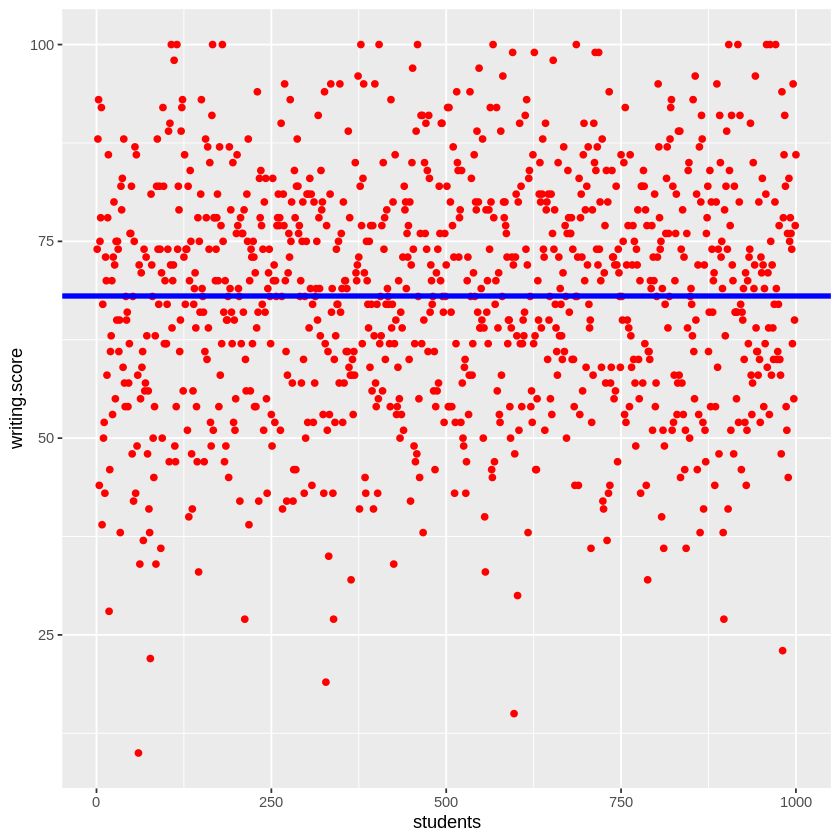

In [3]:
print('As seen by the following data, the reading scores are more varied than writing scores')
print('However, their means are really close')
mean_read <- mean(d$reading.score)
mean_write <- mean(d$writing.score)

print(paste('Mean reading score:', mean_read))
print(paste('Mean writing score:', mean_write))

students <- as.numeric(rownames(d))
sp <- ggplot(d, aes(x=students, y=reading.score)) + geom_point(color='blue') 
sp <- sp + geom_hline(
    yintercept=mean_read,
    linetype='solid',
    color='red',
    size=1.5
)
print(sp)

sp <- ggplot(d, aes(x=students, y=writing.score)) + geom_point(color='red') 
sp <- sp + geom_hline(
    yintercept=mean_write,
    linetype='solid',
    color='blue',
    size=1.5
)
print(sp)

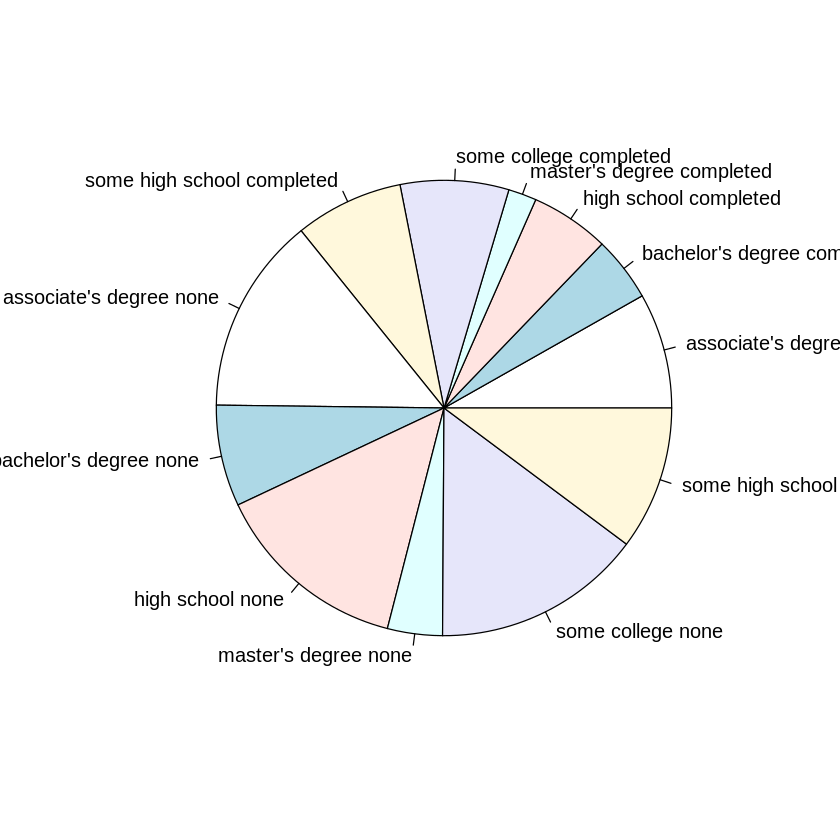

In [4]:
df <- as.data.frame(table(d$parental.level.of.education, d$Target))

x <- df$Freq
labels <- paste(df$Var1, df$Var2)
pie(x, labels)

## 3. Identify the attributes impacting the target attribute

[1] "Line of linear regression would be horizontal, target DOES NOT VARY with gender."


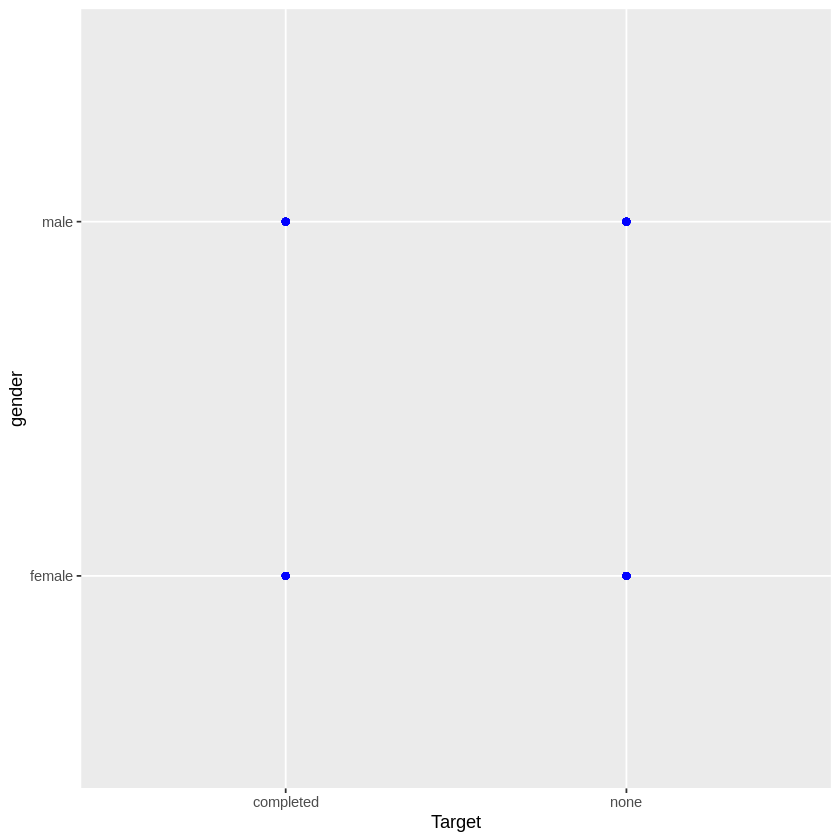

In [5]:
print('Line of linear regression would be horizontal, target DOES NOT VARY with gender.')

ggplot(d, aes(x=Target, y=gender)) + geom_point(color='blue') + geom_smooth(method = "lm", se = FALSE, formula='y ~ x')

[1] "Line of linear regression would be horizontal, target DOES NOT VARY with race/ethnicity."


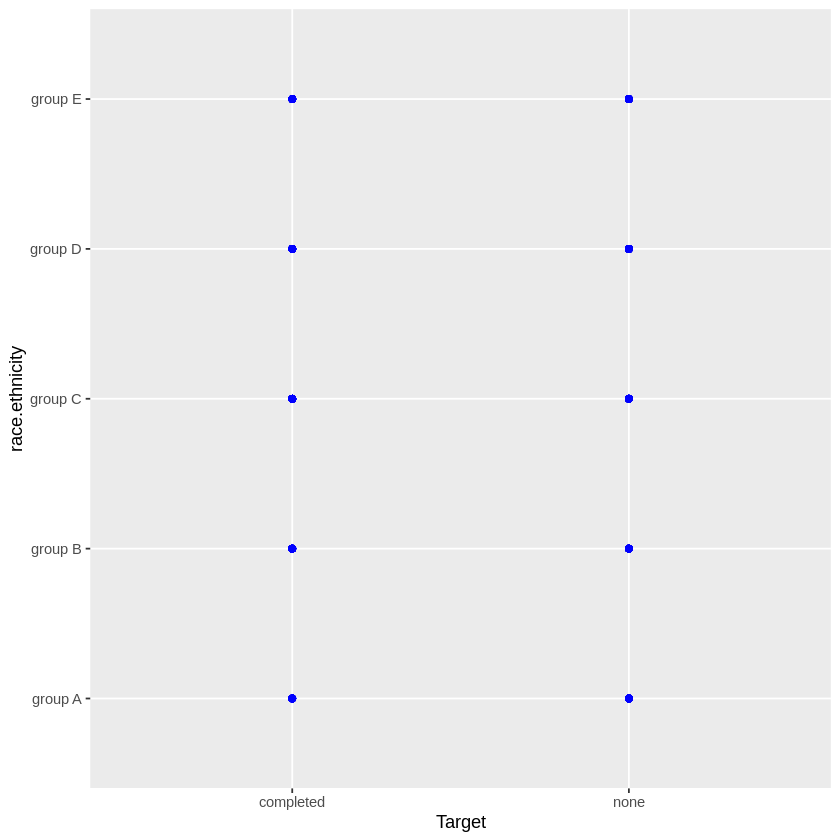

In [6]:
print('Line of linear regression would be horizontal, target DOES NOT VARY with race/ethnicity.')

ggplot(d, aes(x=Target, y=race.ethnicity)) + geom_point(color='blue') + geom_smooth(method = "lm", se = FALSE, formula='y ~ x')

[1] "Line of linear regression would be horizontal, target DOES NOT VARY with level of education."


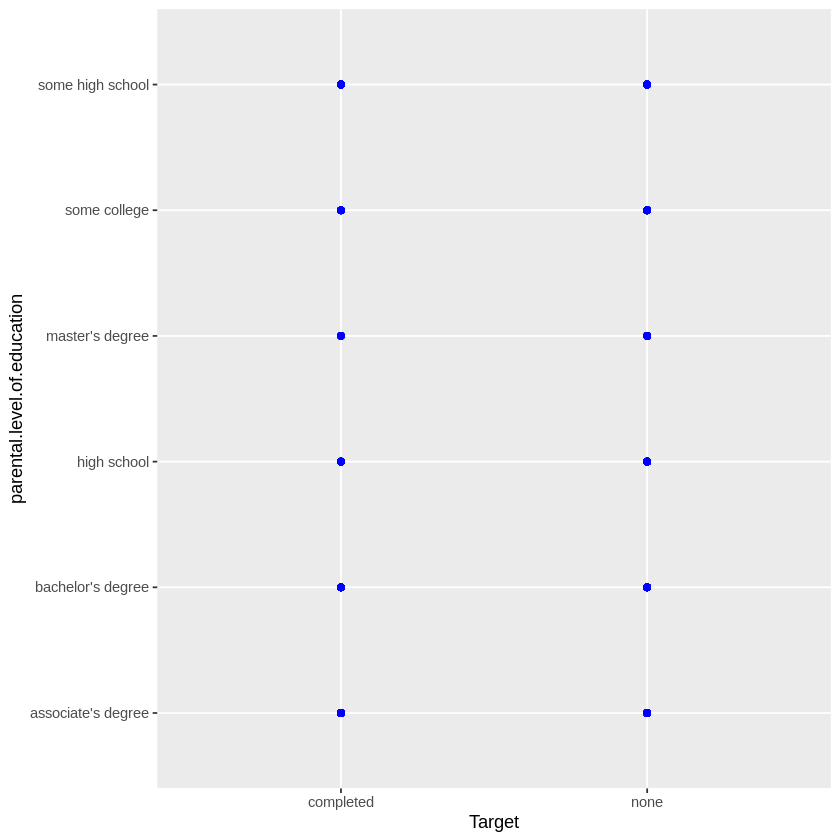

In [7]:
print('Line of linear regression would be horizontal, target DOES NOT VARY with level of education.')

ggplot(d, aes(x=Target, y=parental.level.of.education)) + geom_point(color='blue') + geom_smooth(method = "lm", se = FALSE, formula='y ~ x')

[1] "Line of linear regression would be horizontal, target DOES NOT VARY with lunch."


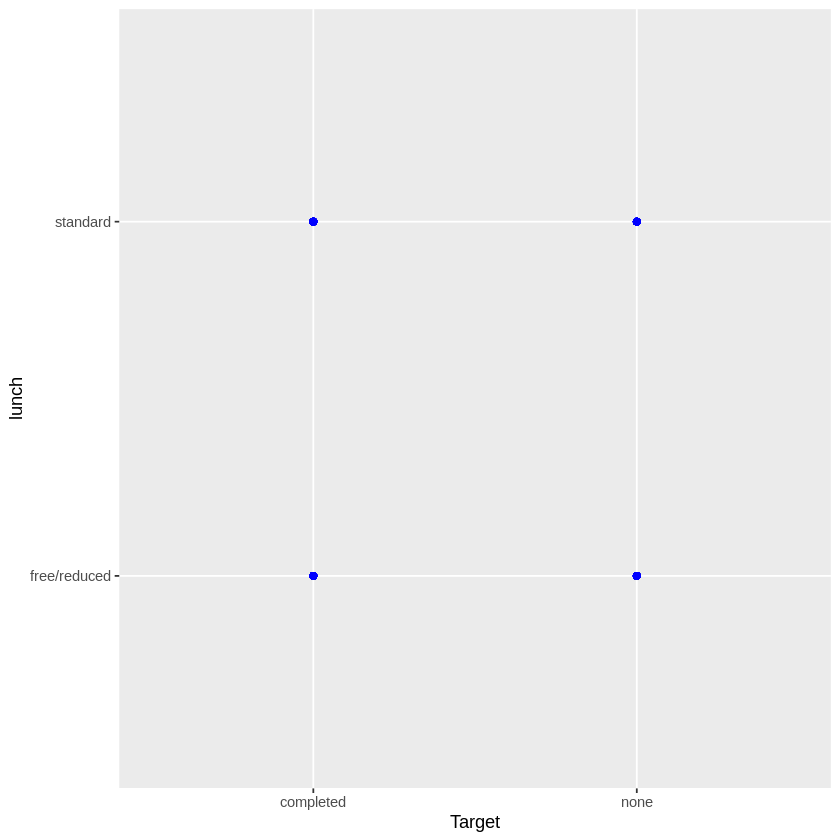

In [8]:
print('Line of linear regression would be horizontal, target DOES NOT VARY with lunch.')

ggplot(d, aes(x=Target, y=lunch)) + geom_point(color='blue') + geom_smooth(method = "lm", se=FALSE, formula='y ~ x')

[1] "Line of linear regression would not be horizontal, target VARIES with math score."


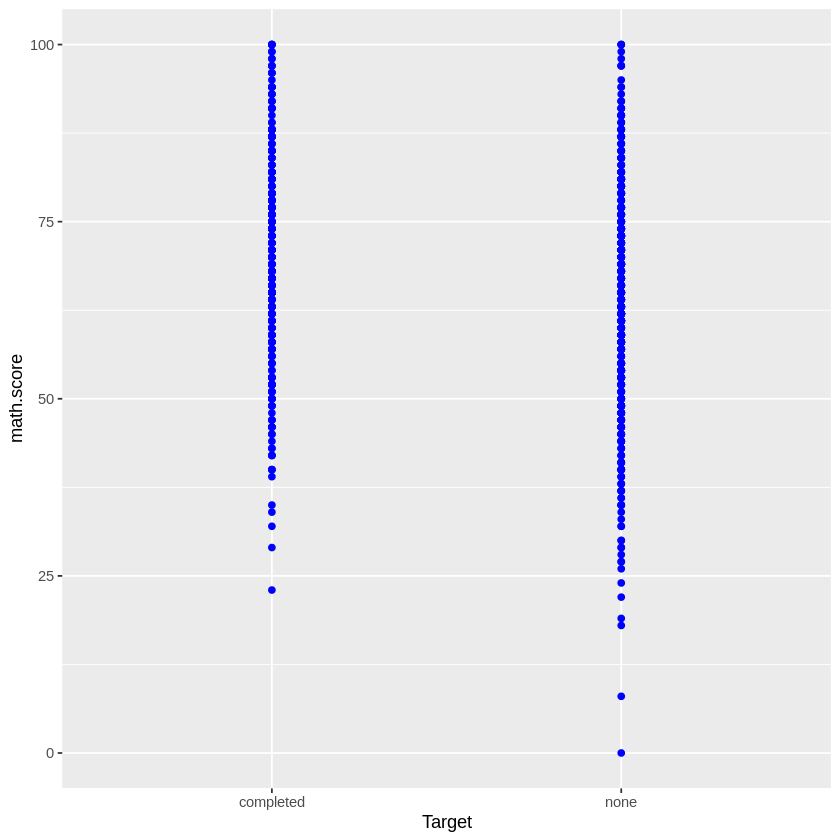

In [9]:
print('Line of linear regression would not be horizontal, target VARIES with math score.')
ggplot(d, aes(x=Target, y=math.score)) + geom_point(color='blue') + geom_smooth(method = "lm", se = FALSE, formula='y ~ x')

[1] "Line of linear regression would not be horizontal, target VARIES with reading score."


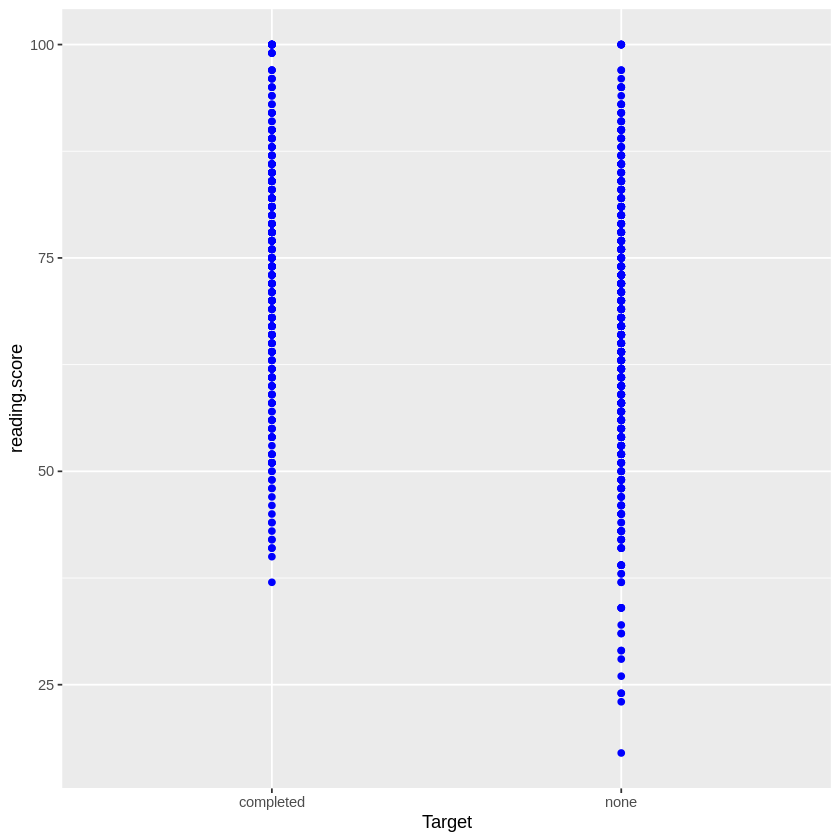

In [10]:
print('Line of linear regression would not be horizontal, target VARIES with reading score.')
ggplot(d, aes(x=Target, y=reading.score)) + geom_point(color='blue') + geom_smooth(method = "lm", se = FALSE, formula='y ~ x')

[1] "Line of linear regression would not be horizontal, target VARIES with writing score."


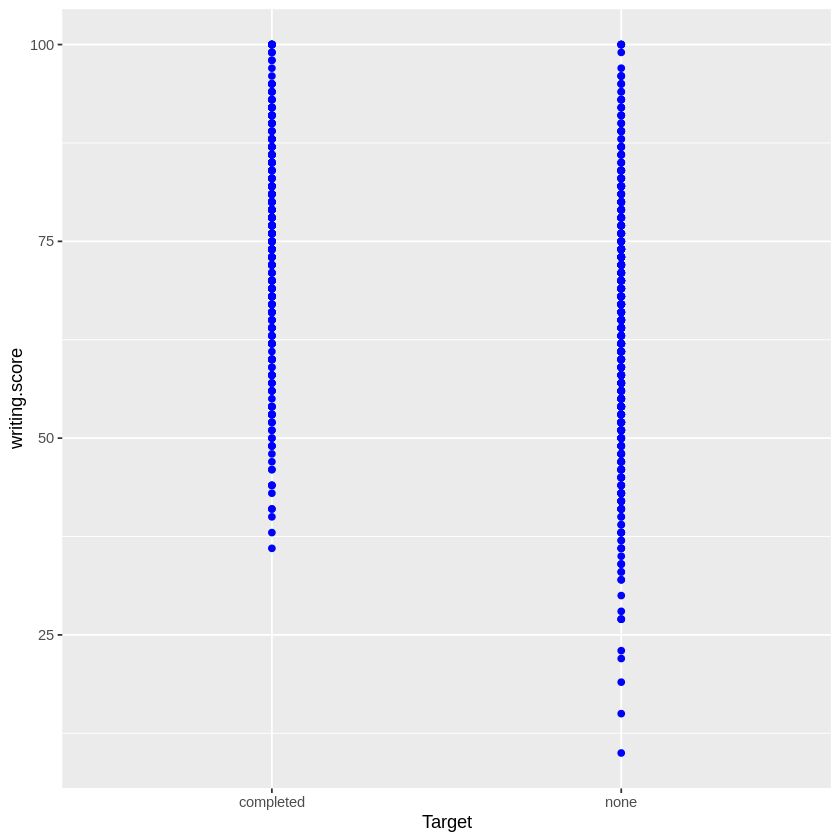

In [11]:
print('Line of linear regression would not be horizontal, target VARIES with writing score.')
ggplot(d, aes(x=Target, y=writing.score)) + geom_point(color='blue') + geom_smooth(method = "lm", se = FALSE, formula='y ~ x')

## 4. Groupwise Average score

In [12]:
math_avg <-by(d$math.score, d$race.ethnicity, mean)
reading_avg <- by(d$reading.score, d$race.ethnicity, mean)
writing_avg <- by(d$writing.score, d$race.ethnicity, mean)

print(
    matrix(c(math_avg, reading_avg, writing_avg),
             nr=5,
             dimnames = list(c("Group A","Group B","Group C", "Group D", "Group E"),
                             c("Math","Reading","Writing"))
          )
)

            Math  Reading  Writing
Group A 61.62921 64.67416 62.67416
Group B 63.45263 67.35263 65.60000
Group C 64.46395 69.10345 67.82759
Group D 67.36260 70.03053 70.14504
Group E 73.82143 73.02857 71.40714


## 5. Effect of gender on reading and writing skills

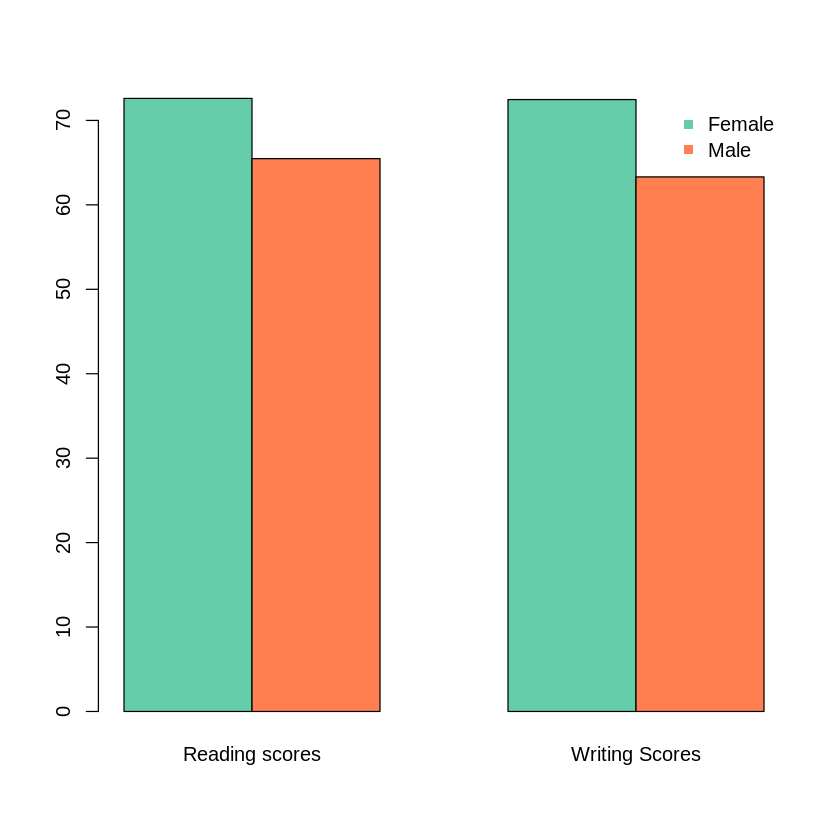

In [13]:
A <- by(d$reading.score, d$gender, mean)
B <- by(d$writing.score, d$gender, mean)

barplot(matrix(c(A, B),nr=2), beside=T, 
        col=c("aquamarine3","coral"), 
        names.arg=c('Reading scores', 'Writing Scores'))
legend("topright", c("Female","Male"), pch=15, 
       col=c("aquamarine3","coral"), 
       bty="n")